<a href="https://colab.research.google.com/github/3zero69/-/blob/main/%ED%95%B8%EC%A6%88%EC%98%A8%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_CH3_%EB%B6%84%EB%A5%98_pg_127~154.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CHAPTE 3. 분류
* 1장. 가장 일반적인 지도학습 작업: 회귀(값 예측) /분류(클래스 예측)
* 2장. 주택 가격 예측 회귀 작업 알고리즘 - 선형 회귀, 결정 트리, 랜덤 포레스트
* 3장. 분류 시스템

## 3.1 MNIST
* **MNIST** : 70,000개의 작은 숫자 이미지를 모은 데이터셋
 - 각 이미지에는 어떤 숫자를 나타내는지 레이블 되어 있음

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#@title MINIST 데이터셋 내려받는 코드
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame = False)
mnist.keys()

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

- 'DESCR' 키: 데이터셋을 설명 
- 'data' 키: 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가짐
- 'target' 키: 레이블 배열을 담음

In [ ]:
#@title 배열 살펴보기
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [ ]:
y.shape

(70000,)

- 이미지가 70,000개 있고 각 이미지에는 784개의 특성이 있음 (28x28 픽셀)

  - 개개의 특성은 단순히 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타냄

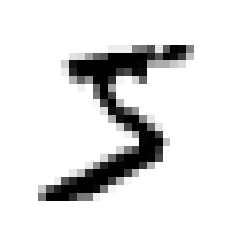

In [ ]:
#@title 데이터셋에서 이미지 확인
import matplotlib as mpl
import matplotlib.pyplot as plt

#샘플의 특성 벡터를 추출해 28 x 28 배열로 크기 바꿈
some_digit = X[0]  # X.np_array[0]
some_digit_image = some_digit.reshape(28,28) 

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
# 실제 레이블 확인 (cf.레이블은 문자열)
y[0]

'5'

In [ ]:
# 머신러닝 알고리즘은 숫자를 기대하므로 y를 정수로 변환
y = y.astype(np.uint8)

주의 ) 데이터를 자세히 조사하기 전에 항상 테스트 세트를 만들고 따로 떼어놓아야 함.

In [ ]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## 3.2 이진 분류기 훈련

* 이진 분류기 : '5'와 '5아님' 두 개의 클래스를 구분할 수 있음

In [ ]:
# 분류 작업을 위한 타깃 벡터 생성

y_train_5 = (y_train == 5) # 5는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == 5)

In [ ]:
#@title 분류 모델 선택 및 훈련 - 확률적 경사 하강법(SGD) 분류기

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) #SGDClassifier는 훈련에 무작위성을 사용함. 결과를 재현하고 싶다면 random_state 지정해야 함
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

* 확률적 경사 하강법(SGD) 분류기
 - 매우 큰 데이터셋을 효율적으로 처리하는 장점
  - 한 번에 하나씩 훈련 샘플을 독립적으로 처리함

In [ ]:
# 숫자 5의 이미지 감지
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

## 3.3 성능 측정

### 3.3.1 교차 검증을 사용한 정확도 측정


In [ ]:
#@title 교차검증 구현 

# skelarn의 cross_val_score() 와 같은 작업 코드

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf) # 분류기 객체(모델) 복제 후 훈련
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

'''
for train_index, test_index in skfolds.split(X_train, y_train_5):
  clone_clf = clone(sgd_clf) # 분류기 객체(모델) 복제 후 훈련
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_5[train_index]
  X_test_fold = X_train[test_index]
  y_test_fold = y_train_5[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))
'''

0.9669
0.91625
0.96785


'\nfor train_index, test_index in skfolds.split(X_train, y_train_5):\n  clone_clf = clone(sgd_clf) # 분류기 객체(모델) 복제 후 훈련\n  X_train_folds = X_train[train_index]\n  y_train_folds = y_train_5[train_index]\n  X_test_fold = X_train[test_index]\n  y_test_fold = y_train_5[test_index]\n\n  clone_clf.fit(X_train_folds, y_train_folds)\n  y_pred = clone_clf.predict(X_test_fold)\n  n_correct = sum(y_pred == y_test_fold)\n  print(n_correct / len(y_pred))\n'

**StratifiedKFold** 는 클래스별 비율이 유지되도록 폴드를 만들기 위해 계층적 샘플링 수행
  - 매 반복에서 분류기 객체를 복제하여 훈련 폴드로 훈련시키고 테스트 폴드로 예측을 만듦
  - 그 다음 올바른 예측의 수를 세어 정확한 예측의 비율을 출력함

In [ ]:
#@title cross_val_score() 함수로 폴드가 3개인 k-겹 교차 검증을 사용해 SGDClassifier 모델 평가

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

## 결과: 모든 교차 검증 폴드에 대해 정확도(accuracy)가 95% 이상

array([0.95035, 0.96035, 0.9604 ])

**k-겹 교차 검증** 은 훈련 세트를 k개의 폴드로 나누고, 각 폴드에 대해 예측을 만들고 평가하기 위해 나머지 폴드로 훈련시킨 모델을 사용

In [ ]:
#@title 모든 이미지를 '5 아님' 클래스로 분류하는 더미 분류기 생성 및 비교

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X),1), dtype=bool)

In [ ]:
# 모델의 정확도 추측
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

## 결과: 정확도 90% 이상 (이미지의 10% 정도만 숫자 5 이기 때문에 무조건 '5 아님' 으로 예측하면 정확히 맞출 확률이 90%)

array([0.91125, 0.90855, 0.90915])

해당 예제는 정확도를 분류기의 성능 측정 지표로 선호하지 않는 이유를 보여줌. 
- 특히 **불균형한 데이터셋**을 다룰 때 더욱 그러함

### 3.3.2 오차 행렬


**오차행렬**: 분류기의 성능을 평가하는 더 좋은 방법

 - 클래스 A의 샘플이 클래스 B로 분류된 횟수를 세는 것
   - 예) 분류기가 숫자 5의 이미지를 3으로 잘못 분류한 횟수를 알고 싶다면 오차 행렬의 5행 3열을 보면 됨
 - 실제 타깃과 비교할 수 있도록 먼저 예측값을 만들어야 함
   - 테스트 세트로 예측을 만들 수 있지만 사용하면 안 됨 (테스트 세트는 분류기가 출시 준비를 마치고 나서 프로젝트의 맨 마지막에 사용됨)
   - cross_val_predict() 함수 사용
     - k-겹 교차 검증을 수해하지만 평가 점수를 반환하지 않고, 각 테스트 폴드에서 얻은 예측을 반환
     - 훈련 세트의 모든 샘플에 대해 깨끗한 예측을 얻게 됨(모델이 훈련하는 동안 보지 못했던 데이터에 대해 예측)
      

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

## 결과:
## 첫번째 행 - '5 아님' 이미지(음성 클래스) : 53892개를 '5 아님'으로 정확하게 분류 (진짜 음성) /나머지 687개는 '5' 라고 잘못 분류 (거짓 양성)
## 두번째 행 - '5' 이미지(양성 클래스) : 1891개를 '5 아님'으로 잘못 분류 (거짓 음성) /나머지 3530개는 정확히 '5' 라고 분류 (진짜 양성)

array([[53892,   687],
       [ 1891,  3530]])

* 오차 행렬 결과
 - 행: 실제 클래스
 - 열: 예측한 클래스


In [ ]:
# 완벽한 분류기라면, 진짜 양성과 진짜 음성만 가지고 있을 것이므로 오차 행렬의 주대각선(왼쪽 위에서 오른쪽 아래로)만 0이 아닌 값 
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

* **정밀도** : 양성 예측의 정확도
$$정밀도 = {TP \over TP+FP}$$
  - TP : 진짜 양성의 수
  - FP : 거짓 양성의 수
 

* **재현율** : 정확하게 감지한 양성 샘플의 비율 (민감도, 진짜 양성 비율)
$$재현율 = {TP \over TP+FN}$$
  - FN : 거짓 음성의 수

###3.3.3 정밀도와 재현율

In [ ]:
#@title (사이킷런) 정밀도와 재현율을 계산하는 함수 

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred) #

0.8370879772350012

In [ ]:
recall_score(y_train_5, y_train_pred)

## 결과: 5로 판별된 이미지 중 65.11% 만 정확함, 전체 숫자 5에서 65.11% 만 감지

0.6511713705958311

- **F1 점수** : 정밀도와 재현율의 조화 평균
  - 두 분류기를 비교할 때 F1 을 사용하면 편리함

  $$ F1 = {2 \over {{1 \over 정밀도)} + {1 \over 재현율}}} = {2 * {정밀도 * 재현율 \over 정밀도 + 재현율}} = {TP \over {TP + {FN+FP \over 2}}} $$



In [ ]:
#@title F1 점수 계산 - f1_score() 함수
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

정밀도와 재현율이 비슷한 분류기에서는 F1 점수가 높음

그러나, 둘 다를 얻을 수는 없음. 정밀도를 올리면 재현율이 줄고, 그 반대도 마찬가지 **정밀도/재현율 트레이드오프**

### 3.3.4 정밀도/재현율 트레이드오프



사이킷런에서 임곗값을 직접 지정할 수는 없지만 예측에 사용한 점수는 확인 할 수 있음. 

* predict() 대신 decsion_function() 매서드 호출
 - 각 샘플의 점수를 얻을 수 있음
 - 이 점수를 기반으로 원하는 임곗값을 정해 예측을 만들 수 있음

In [ ]:
#@title 예측에 사용한 점수 확인 - decision_function() 메서드
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

## 결과: 임곗값이 0 이므로 predict() 매서드와 같은 결과(True) 반환

array([[False, False, False,  True, False, False, False, False, False,
        False]])

In [ ]:
# SGDClassifier 의 임곗값을 높이는 경우
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

## 결과: 임곗값을 높이면 재현율이 줄어듦

array([[False, False, False, False, False, False, False, False, False,
        False]])

#### < **적절한 임곗값을 정하는 방법 1** >


1. cross_val_predict() 함수를 사용해 훈련 세트에 있는 모든 샘플의 점수를 구해야 함
  - 예측 결과가 아닌 결정 점수를 반환하도록 지정 

In [ ]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

2. 이 점수로 precision_recall_curve() 함수를 사용하여, 가능한 모든 임곗값에 대해 정밀도와 재현율 계산

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

3. 맷플롯립, 임곗값의 함수로 정밀도와 재현율을 그릴 수 있음

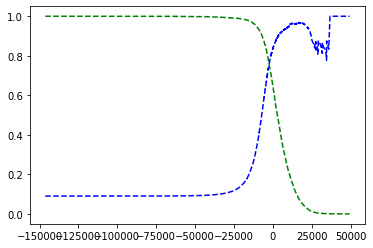

In [ ]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
  plt.plot(thresholds, recalls[:-1], "g--", label="재현율")

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()  

## 결과
## 정밀도 곡선이 재현율 곡선보다 더 울퉁불퉁한 이유: 임곗값을 올리더라도 정밀도가 가끔 낮아질 때가 있음

#### **< 적절한 임곗값을 정하는 방법 2>**



* 재현율에 대한 정밀도 곡선 그리기

In [ ]:
## 결과: 재현율 80% 근처에서 정밀도가 급격하게 줄어듦 

하강점 직전을 정밀도/재현율 트레이드오프로 선택하는 것이 좋음

***정밀도 90% 달성 목표***
* [그림 3-4]: 임곗값 약 8,000 정도

In [ ]:
#@title 정밀도 90% 달성 목표

# 최소한 90% 정밀도가 되는 가장 낮은 임곗값을 찾을 수 있음
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)] #np.argmax() : 최댓값의 첫번째 인덱스 반환 (첫번째 True 값)

# (훈련 세트에 대한) 예측 생성 - 분류기의 predict() 메서드 호출 대신 다음 코드 실행
y_train_pred_90 = (y_scores >= threshold_90_precision)


In [ ]:
#@title 예측에 대한 정밀도와 재현율 확인

# 정밀도
precision_score(y_train_5, y_train_pred_90) 

0.9000345901072293

In [ ]:
# 재현율
recall_score(y_train_5, y_train_pred_90)

## 재현율이 너무 낮다면 높은 정밀도의 분류기는 전혀 유용하지 않음

0.4799852425751706

### 3.3.5 ROC 곡선


* **수신기 조작 특성 (ROC) 곡선** - 이진 분류에서 널리 사용하는 도구
  - 정밀도에 대한 재현율 곡선이 아닌, 거짓 양성 비율*(FPR)*에 대한 진짜 양성 비율*(TPR*, 재현율의 다른 이름) 의 곡선
    - *FPR* : 양성으로 잘못 분류된 음성 샘플의 비율 / 1 - *진짜 음성 비율* (*TNR*, 특이도)
      - *TNR* :음성으로 정확하게 분류한 음성 샘플의 비율
  - *민감도(재현율)* 에 대한 *1 - 특이도* 그래프

ROC 곡선 그리는 법





In [ ]:
#@title 1. roc_curve() 함수: 여러 임곗값에서 TPR과 FPR 계산

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

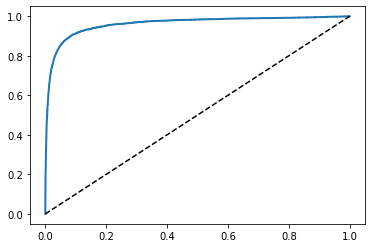

In [ ]:
#@title 2.  TPR 에 대한 FPR 곡선 

def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2,label=label)
  plt.plot([0,1],[0,1],'k--')

plot_roc_curve(fpr, tpr)
plt.show()  

## 결과: 모든 가능한 임곗값에서 진짜 양성 비율에 대한 거짓 양성 비율을 나타낸 ROC 곡선. 붉은 점이 선택한 비율의 지점(43.68% 재현율)

- 재현율(TPR) 이 높을수록 분류기가 만드는 거짓 양성(FPR) 이 늘어남
- 점선은 완전한 랜덤 분류기의 ROC 곡선을 뜻함
  - 좋은 분류기는 점선에서 최대한 멀리 떨어져 있어야 함 (왼쪽 위 모서리)

In [ ]:
#@title 분류기 비교 - 곡선 아래의 면적(AUC) 측정

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

* 완벽한 분류기는 ROC의 AUC가 1, 완전한 랜덤 분류기는 0.5

#### **RandomForestClassifier 를 훈련시켜 SGDClassifier의 ROC 곡선과 ROC AUC 점수 비교**

1. **predict_proba()**: 샘플이 행, 클래스가 열이고 샘플이 주어진 클래스에 속할 확률을 담은 배열 반환


In [ ]:
#@title predict_proba()

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

2. **roc_curve()** : 레이블과 점수 기대 / 점수 대신 클래스 확률 전달 가능

In [ ]:
#@title roc_curve()

y_scores_forest = y_probas_forest[:,1]  # 양성 클래스에 대한 확률을 점수로 사용
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

3. ROC 곡선 그리기

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47004 (\N{HANGUL SYLLABLE RAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45924 (\N{HANGUL SYLLABLE DEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPytho

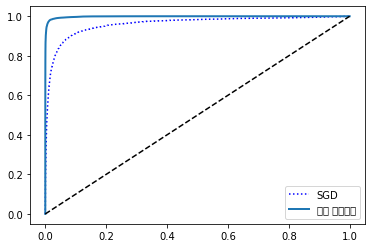

In [ ]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right")
plt.show()

## ROC 곡선 비교: 랜덤 포레스트 분류기가 SGD 분류기보다 훨씬 좋음 (랜덤 포레스트의 ROC 곡선이 왼쪽 위 모서리에 더 가까워 AUC 값이 크기 때문)

In [ ]:
roc_auc_score(y_train_5, y_scores_forest) 

## ROC AUC 점수도 훨씬 높음

0.9983436731328145

> 정리 
* 분류기를 훈련시키는 방법과 작업에 맞는 적절한 지표 선택
* 교차 검증을 사용한 평가
* 요구 사항에 맞는 정밀도/재현율 트레이드오프 선택
* ROC 곡선과 ROC AUC 점수를 사용한 여러 모델의 비교

## 3.4 다중 분류

* 이진 분류: 두 개의 클래스를 구별
* 다중 분류기 (다항 분류기) : 둘 이상의 클래스를 구별



In [ ]:
#@title SVC 서포트 벡터 머신 분류기

from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train) #y_train_5가 아닌 y_train 사용 : 5를 구별한 타깃 클래스(y_train_5) 대신 0에서 9까지의 원래 타깃 클래스(y_train) 을 사용해 SVC를 훈련 시킴
svm_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
#@title decision_function() 으로 확인
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

## 가장 높은 점수가 클래스 5에 해당하는 값

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [ ]:
np.argmax(some_digit_scores)

5

In [ ]:
svm_clf.classes_ # 분류기 훈련 시 classes_ 속성에 타깃 클래스의 리스트르 값으로 정렬하여 저장

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
svm_clf.classes_[5]

5

In [ ]:
#@title OvO 나 OvR 사용하도록 강제

from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train,y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [ ]:
len(ovr_clf.estimators_)

10

In [ ]:
#@title SGDClassifier(또는 RandomForestClassifier) 훈련

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

SGD 분류기는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에 별도로 사이킷런의 OvR 이나 OvO를 적용할 필요 없음

In [ ]:
#@title SGD 분류기가 클래스마다 부여한 점수 확인

sgd_clf.decision_function([some_digit]) # decision_function() 메서드는 클래스마다 하나의 값을 반환

## 분류기가 예측 결과에 강한 확신을 보임 
## 대부분의 점수가 큰 음수 /반면, 클래스 5의 점수는 
## 이 모델은 점수를 얻은 클래스 3을 조금 의심함

In [ ]:
#@title 분류기 평가 - 교차검증

cross_val_score(sgd_clf, X_train, y_train, cv=3,scoring="accuracy") # cross_val_score() 함수를 사용해 SGDClassifier 정확도 평가

## 모든 테스트 폴드에서 84% 이상을 얻음

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
# 성능을 더 높이는 법 - 예) 입력의 스케일 조정

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

## 정확도를 89% 이상으로 높임

array([0.8983, 0.891 , 0.9018])

## 3.5 에러 분석

머신러닝 프로젝트 체크리스트(부록B) 의 단계
1. 데이터 준비 단계에서 가능한 선택 사항 탐색
2. 여러 모델 시도
3. 가장 좋은 몇 개를 골라 GridSearchCV 사용해 하이퍼파라미터를 세밀하게 튜닝 및 자동화

#### 가능성이 높은 모델을 하나 찾았다고 가정하고, 이 모델의 성능을 향상시킬 방법 찾아보기

만들어진 에러의 종류 분석


In [ ]:
#@title 오차 행렬 살펴보기
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
# 1. matshow() 함수: 오차 행렬을 이미지로 표현
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

## 대부분의 이미지가 올바르게 분류되었음을 나타내는 주대각선에 있으므로 매우 좋아 보임
## 숫자 5는 다른 숫자보다 조금 더 어두워보임 
##
## 데이터셋에 숫자 5의 이미지가 적거나, 분류기가 숫자 5를 다른 숫자만큼 잘 분류하지 못한다는 의미

In [ ]:
# 2. 에러 비율 비교 : 오차 행렬의 각 값을 대응되는 클래스의 이미지 개수로 나누어 에러 비율 비교

row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

#다른 항목은 그대로 유지하고 주대각선만 0으로 채워 그래프 그림
np.fill_diagonal(norm_conf_mx, 0) 
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

## 행은 실제 클래스를 나타내고 열은 예측한 클래스를 나타냄!

## 클래스 8의 열이 상당히 밝음 - 많은 이미지가 8로 잘못 분류 되었음
## 클래스 8의 행은 그리 나쁘지 않음 - 실제 8이 적절히 8로 분류 되었음
##
## 오차 행렬이 반드시 대칭인 것은 아님

## 3과 5가 (서로) 많이 혼동 되고 있음

오차 행렬 분석 시, 분류기의 성능 향상 방안에 대한 통찰을 얻을 수 있음 

* 8로 잘못 분류되는 것을 줄이도록 개선할 필요성
  - 8처럼 보이는 (하지만 실제 8은 아닌) 숫자의 훈련 데이터를 더 많이 모아 실제 8과 구분하도록 분류기 학습
  - 분류기에 도움 될 만한 특성 찾아보기 
   - 동심원의 수를 세는 알고리즘 (8은 2개, 6은 1개 ...)
   - 동심원 같은 어떠한 패턴이 드러나도록 이미지 전처리




개개의 에러를 분석하면 분류기가 무슨 일을 하고, 왜 잘못되었는지에 대한 통찰을 얻을 수 있음

그러나, 더 어렵고 시간이 오래 걸림 

In [ ]:
# 예. 3과 5의 샘플 그리기

cl_a, cl_b = 3,5
X_aa = X_train[(y_train==cl_a) & (y_train_pred==cl_a)]
X_ab = X_train[(y_train==cl_a) & (y_train_pred==cl_b)]
X_ba = X_train[(y_train==cl_b) & (y_train_pred==cl_a)]
X_bb = X_train[(y_train==cl_b) & (y_train_pred==cl_b)]

def plot_digits(instances, images_per_row=10, **options): 
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row: (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatentate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(8,8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## 왼쪽 5x5 블록 두 개는 3으로 분류된 이미지 /오른쪽 5x5 블록 두 개는 5로 분류된 이미지

대부분의 잘못 분류된 이미지는 확실히 에러인 것 같고, 분류기가 실수한 이유를 이해하기 어려움

원인은 SGDClassifier를 사용했기 때문
 - 선형 분류기는 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산
 - 따라서 3과 5는 몇 개의 픽셀만 다르기 때문에 쉽게 혼동

분류기는 이미지의 위치나 회전 방향에 매우 민감
* 3과 5의 에러를 줄이는 방법
 - 이미지를 중앙에 위치시키고 회전되어 있지 않도록 전처리 

##3.6 다중 레이블 분류
분류기가 샘플마다 여러 개의 클래스를 출력해야 할 때도 있음

* **다중 레이블 분류 시스템**: 여러 개의 이진 꼬리표를 출력하는 분류 시스템
  - 예 ) 얼굴 인식 분류기
    - 같은 사진에 여러 사람이 등장하는 경우, 인식된 사람마다 하나씩 꼬리표를 붙여야 함
    - 분류기가 앨리스, 밥, 찰리 세 얼굴을 인식하도록 훈련되었다고 가정: 앨리스와 찰리가 있는 사진을 보는 경우 [1,0,1] 출력해야 함

In [ ]:
#@title 다중 레이블 분류 예시

# 각 숫자 이미지에 두 개의 타깃 레이블이 담긴 y_multilabel 배열을 만듦
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) # 숫자가 큰 값(7,8,9) 인지 나타냄
y_train_odd = (y_train % 2 == 1) # 홀수 인지 나타냄
y_multilabel = np.c_[y_train_large, y_train_odd] 

# KNeighborsClassifier 인스턴스를 만들고 다중 타깃 배열을 사용하여 훈련
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel) 

In [ ]:
knn_clf.predict([some_digit])

## 올바르게 분류되었음. 숫자 5는 크지 않고(False) 홀수(True)

In [ ]:
#@title 다중 레이블 분류기를 평가하는 방법

# 모든 레이블의 F1 점수를 구하고 평균 점수 계산 
y_train_knn_pred= cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average='macro') # 모든 레이블의 가중치가 같다고 가정 
                                                          # average = 'weighted' : 레이블에 클래스의 지지도(타깃 레이블에 속한 샘플 수)를 가중치로 줌, 앨리스 사진이 밥이나 찰리 사진보다 훨씬 많다면 앨리스 사진에 대한 분류기의 점수에 더 높은 가중치를 둠

## 3.7 다중 출력 분류

* **다중 출력 다중 클래스 분류 (다중 출력 분류)** : 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화 한 것 (즉, 값을 두 개 이상 가질 수 있음)

#### 이미지에서 잡음을 제거하는 시스템

In [ ]:
#@title MNIST 이미지에서 추출한 세트의 픽셀 강도에 잡음 추가

noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
#@title 테스트 세트에서 이미지 선택

idx = 36000

plt.subplot(2,1,1)
plt.inshow(X_train_mod[idx].reshape(28,28))
plt.subplot(2,1,2)
plt.imshow(y_train_mod[idx].reshape(28,28))
plt.show()

In [ ]:
#@title 분류기 훈련 및 이미지 깨끗하게 만들기

knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[idx]])

plt.imshow(clean_digit.reshape(28,28))
plt.show() 

#plot_digit(clean_digit)